####**Training Templates for machine learning models**

In [ ]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import ast

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#importing datasets
df = pd.read_excel('/content/drive/MyDrive/Machine Learning Final Project/college_program.xlsx')
df.drop(columns = 'university', index = 0, inplace = True)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,yr_level,current_program,hs_type,parents_educ,parents_fields,reloc,travel_time_to_campus,financial_source,ave_household_income,...,ave_study_hours,college_preparedness,pstrength_stem,pstrength_abm,pstrength_techvoc,pstrength_humss,passion,careerpath_interest,hs_favesub,hs_extracurr
1,Male,4th Year,BS Applied Mathematics - Data Science Track,Science High School,High School Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,12,Parents,50000.0,...,4.0,3,5,4,3,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec..."
2,Male,4th Year,BS Nutrition and Dietetics,Science High School,Postgraduate,"Education and Academia, Law and Public Service",Yes,10,Parents,75000.0,...,0.5,3,3,2,3,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Literature",Journalism
3,Male,4th Year,BS Chemical Engineering,Science High School,High School Graduate,"Education and Academia, Law and Public Service",No,45,Parents,40000.0,...,2.5,3,3,3,3,4,5,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Physical Education",Sports
4,Male,4th Year,BS Chemical Engineering,Technical,College Graduate,"Health and Medicine, Hospitality and Service I...",No,20,Parents,100000.0,...,1.5,2,3,2,4,2,4,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu..."
5,Female,4th Year,BS Chemical Engineering,Private,College Graduate,Business and Management,Yes,5,Parents,100000.0,...,1.0,3,4,2,1,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science","Music and Dancing, Arts and Crafts"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,4th Year,BS Computer Engineering,Private,Postgraduate,"Health and Medicine, Education and Academia",Yes,35,Parents,35000.0,...,3.0,1,2,1,3,3,2,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,Debate and Public Speaking
97,Male,1st Year,BS Computer Science,Public,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,40000.0,...,2.0,4,5,4,5,4,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology","Sports, Arts and Crafts, Debate and Public Spe..."
98,Female,1st Year,BS Electrical engineering,Public,No formal education,Hospitality and Service Industry,No,50,Parents,17600.0,...,7.5,2,3,1,4,5,3,"STEM (Science, Technology, Engineering, Mathem...","History, Social Studies, Technology","Writing, Debate and Public Speaking"
99,Male,2nd Year,BS Electrical engineering,Private,Postgraduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,60361.0,...,4.0,3,5,1,2,1,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science","Science Clubs, Coding and Technology, Gaming"


In [ ]:
#cleaning the current_programs column
unique_programs = df['current_program'].unique().tolist()
unique_programs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['BS Applied Mathematics - Data Science Track',
 'BS Nutrition and Dietetics',
 'BS Chemical Engineering',
 'BS Nursing',
 'BS Computer Engineering',
 'BS Architecture',
 'BS Applied Mathematics Data Science',
 'BS Mechanical Engineering',
 'BS Psychology ',
 'BS Medical Laboratory Sciences',
 'Computer Engineering Tech',
 'Bs Applied Mathematics ',
 'BS Internal Auditing',
 'BS MATHEMATICS ',
 'BS Psychology',
 'Bs Computer Engineering ',
 'BSEMC Game Development',
 'BTech AIDS ',
 'AB Behavioral Science',
 'BSBA Marketing Management',
 'BS Applied Mathematics',
 'BS Computer Science',
 'BS Pharmacy',
 'BS Accountancy',
 'BS Civil Engineering',
 'BS Information Technology ',
 'Associate in Aircraft Mechanic',
 'BS Applied Math Data Science',
 'BS Electronics Communication Engineering ',
 'BSED major in Values Education',
 'Bachelor of Library and Information Science',
 'BS Computer Engineering ',
 'BS Hospitality Management ',
 'Library and Information Science',
 'Bachelor in Library 

In [ ]:
#Removing the prefixes and cleaning the current_program column
df['current_program'] = df['current_program'].str.lower() \
                                           .str.replace('^bsed', 'secondary education', regex = True) \
                                           .str.replace('^bsba', 'business administration', regex = True) \
                                           .str.replace('bachelor in ', '', regex = True) \
                                           .str.replace('bachelor of', '', regex = True ) \
                                            .str.replace('bachelor in ', '', regex = True) \
                                           .str.replace('bachelor of', '', regex = True ) \
                                           .str.replace('btech aids', 'artifical intelligence and data science', regex = True) \
                                           .str.replace('^bsemc', ' entertainment and multimedia computing - ', regex = True) \
                                           .str.replace('^bs', '', regex=True) \
                                           .str.replace('^ba', '', regex=True) \
                                           .str.replace('^ab', '', regex = True)



df['current_program'].str.strip()
unique_programs = df['current_program'].unique().tolist()
unique_programs.sort()
unique_programs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[' accountancy',
 ' agriculture ',
 ' applied math data science',
 ' applied math; data science track',
 ' applied mathematic in data sciece',
 ' applied mathematics',
 ' applied mathematics ',
 ' applied mathematics - data science track',
 ' applied mathematics data science',
 ' applied mathematics data science track',
 ' architecture',
 ' astrophysics',
 ' behavioral science',
 ' biology',
 ' chemical engineering',
 ' civil engineering',
 ' communication and media arts',
 ' computer engineering',
 ' computer engineering ',
 ' computer science',
 ' data science ',
 ' electrical engineering ',
 ' electronics and communication',
 ' electronics communication engineering ',
 ' electronics enggineering',
 ' electronics engineering',
 ' entertainment and multimedia computing -  game development',
 ' hospitality management ',
 ' in agriculture ',
 ' information systems',
 ' information technology',
 ' information technology ',
 ' internal auditing',
 ' library and information science',
 ' ma

In [ ]:
# Further cleaning the 'current_program' column

df['current_program'] = (
    df['current_program']
    .str.strip()  # Remove leading and trailing spaces
    .str.replace('math data science$', 'mathematics - data science', regex=True)
    .str.replace('applied mathematic in data sciece', 'applied mathematics - data science', regex=True)
    .str.replace('applied math; data science track', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics - data science track', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics data science', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics data science track', 'applied mathematics - data science', regex=True)
    .str.replace('applied mathematics - data science track', 'applied mathematics - data science', regex = True)



    .str.replace('electronics engineering', 'electrical engineering', regex = True)
    .str.replace('electronics and communication', 'electronics communication engineering', regex = True)
    .str.replace('electronics enggineering', 'electrical engineering', regex=True)
    .str.replace('eletronics communication engineering', 'electronics communication engineering', regex=True)

    .str.replace('computer engineering tech', 'computer engineering', regex = True)

    .str.replace('^medical laboratory sciences', 'medical laboratory science', regex = True)
    .str.replace('in agriculture', 'agriculture', regex = True)

    .str.replace('secondary education mathematics', 'secondary education major in mathematics', regex=True)
    .str.replace('library and information science ', 'library and information science', regex=True)
    .str.replace('artifical', 'artificial', regex=True)
    .str.lower()
)

unique_cleaned_programs = df['current_program'].unique().tolist()
unique_cleaned_programs.sort()
unique_cleaned_programs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['accountancy',
 'aeronautical engineering',
 'agriculture',
 'applied mathematics',
 'applied mathematics - data science',
 'architecture',
 'artificial intelligence and data science',
 'associate in aircraft mechanic',
 'astrophysics',
 'behavioral science',
 'biology',
 'business administration marketing management',
 'chemical engineering',
 'civil engineering',
 'communication and media arts',
 'computer engineering',
 'computer science',
 'data science',
 'electrical engineering',
 'electronics communication engineering',
 'entertainment and multimedia computing -  game development',
 'hospitality management',
 'information systems',
 'information technology',
 'internal auditing',
 'library and information science',
 'mathematics',
 'mechanical engineering',
 'medical laboratory science',
 'nursing',
 'nutrition and dietetics',
 'pharmacy',
 'psychology',
 'radiologic technology',
 'secondary education major in mathematics',
 'secondary education major in values education',
 'te

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

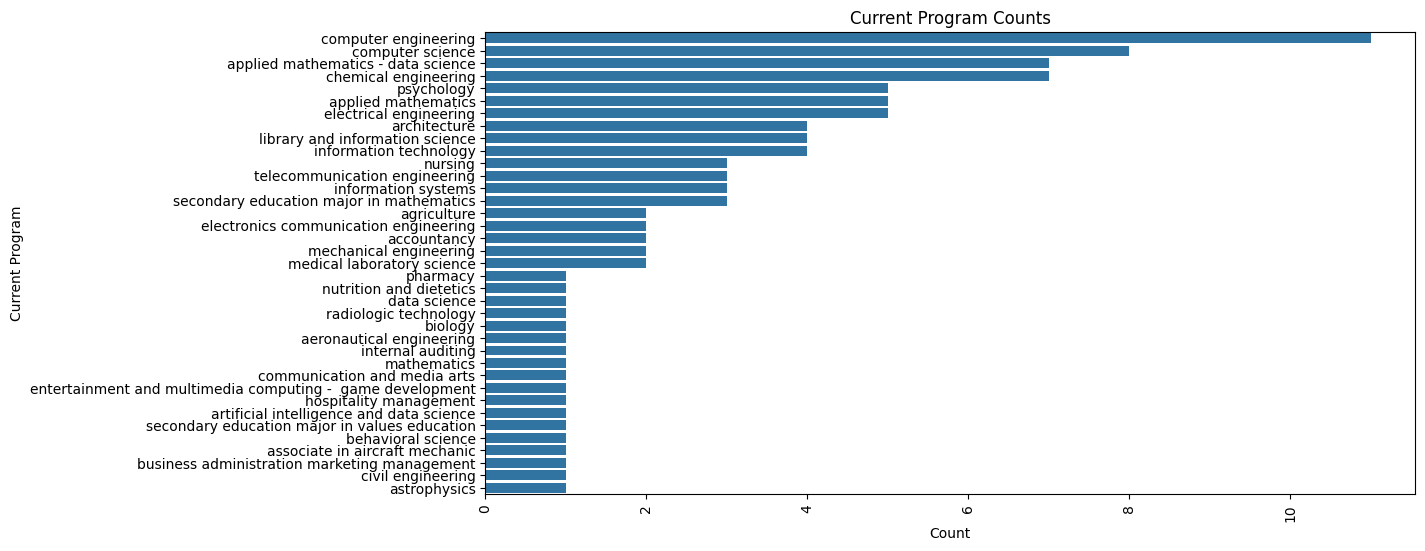

In [ ]:
program_counts = df['current_program'].value_counts()
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=program_counts.values, y=program_counts.index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Current Program Counts')
plt.xlabel('Count')
plt.ylabel('Current Program')
plt

In [ ]:
#cleaning the yr_level column
df['yr_level'] = df['yr_level'].str.replace(r'(st|nd|rd|th)\s*year', '', regex=True, case=False).str.strip().astype(int)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gender,yr_level,current_program,hs_type,parents_educ,parents_fields,reloc,travel_time_to_campus,financial_source,ave_household_income,...,ave_study_hours,college_preparedness,pstrength_stem,pstrength_abm,pstrength_techvoc,pstrength_humss,passion,careerpath_interest,hs_favesub,hs_extracurr
1,Male,4,applied mathematics - data science,Science High School,High School Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,12,Parents,50000.0,...,4.0,3,5,4,3,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, History, Literature, Tec...","Arts and Crafts, Science Clubs, Coding and Tec..."
2,Male,4,nutrition and dietetics,Science High School,Postgraduate,"Education and Academia, Law and Public Service",Yes,10,Parents,75000.0,...,0.5,3,3,2,3,2,3,"STEM (Science, Technology, Engineering, Mathem...","Science, Literature",Journalism
3,Male,4,chemical engineering,Science High School,High School Graduate,"Education and Academia, Law and Public Service",No,45,Parents,40000.0,...,2.5,3,3,3,3,4,5,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Physical Education",Sports
4,Male,4,chemical engineering,Technical,College Graduate,"Health and Medicine, Hospitality and Service I...",No,20,Parents,100000.0,...,1.5,2,3,2,4,2,4,"STEM (Science, Technology, Engineering, Mathem...","Science, History, Technology","Sports, Drama and Theater, Science Clubs, Volu..."
5,Female,4,chemical engineering,Private,College Graduate,Business and Management,Yes,5,Parents,100000.0,...,1.0,3,4,2,1,3,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science","Music and Dancing, Arts and Crafts"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Female,4,computer engineering,Private,Postgraduate,"Health and Medicine, Education and Academia",Yes,35,Parents,35000.0,...,3.0,1,2,1,3,3,2,"STEM (Science, Technology, Engineering, Mathem...",Mathematics,Debate and Public Speaking
97,Male,1,computer science,Public,College Graduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,40000.0,...,2.0,4,5,4,5,4,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science, Technology","Sports, Arts and Crafts, Debate and Public Spe..."
98,Female,1,electrical engineering,Public,No formal education,Hospitality and Service Industry,No,50,Parents,17600.0,...,7.5,2,3,1,4,5,3,"STEM (Science, Technology, Engineering, Mathem...","History, Social Studies, Technology","Writing, Debate and Public Speaking"
99,Male,2,electrical engineering,Private,Postgraduate,"STEM (Science, Technology, Engineering, Mathem...",Yes,15,Parents,60361.0,...,4.0,3,5,1,2,1,5,"STEM (Science, Technology, Engineering, Mathem...","Mathematics, Science","Science Clubs, Coding and Technology, Gaming"


In [ ]:
# Function to clean STEM values
def clean_stem_values(value):
    if isinstance(value, str):
        # Replace the full STEM description with 'STEM'
        value = value.replace('STEM (Science, Technology, Engineering, Mathematics)', 'STEM')
        # Split multiple values and clean each
        values = [v.strip().replace('STEM (Science, Technology, Engineering, Mathematics)', 'STEM') for v in value.split(',')]
        return ', '.join(set(values))
    return value

# Apply cleaning to specific columns
columns_to_clean = ['parents_fields', 'careerpath_interest']

for col in columns_to_clean:
    df[col] = df[col].apply(clean_stem_values)

####**Implementing Association Rule Mining with Apriori Alrgorithm**

In [ ]:
multi_valued_columns = ['parents_fields', 'careerpath_interest', 'hs_favesub', 'hs_extracurr']

# Initialize dictionary to store results
attribute_rule_tables = {}

# Loop through each multi-valued attribute
for col in multi_valued_columns:
    print(f"Processing attribute: {col}")

    # Process transactions for the current column
    processed_data = []
    for values in df[col]:
        items = str(values).split(',')
        transaction = [item.strip() for item in items]
        processed_data.append(transaction)

    # Encode the data for apriori analysis
    te = TransactionEncoder()
    encoded_data = te.fit(processed_data).transform(processed_data, sparse=True)
    df_encoded = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=te.columns_)

    # Apply Apriori algorithm
    frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5, num_itemsets = len(frequent_itemsets))

    # Add ranking and sort by confidence
    rules["Rank"] = rules["confidence"].rank(ascending=False).astype(int)
    rules_sorted = rules.sort_values(by=["confidence", "support"], ascending=[False, False])

    # Save the top 20 rules for this attribute to the dictionary
    attribute_rule_tables[col] = rules_sorted.head(20)


# Print results for each attribute (optional)
for col, rules_table in attribute_rule_tables.items():
    print(f"\nRules for {col}:\n{rules_table}\n")


Processing attribute: parents_fields
Processing attribute: careerpath_interest
Processing attribute: hs_favesub
Processing attribute: hs_extracurr

Rules for parents_fields:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski, Rank]
Index: []


Rules for careerpath_interest:
                 antecedents consequents  antecedent support  \
2   (Education and Academia)      (STEM)                0.21   
1  (Business and Management)      (STEM)                0.31   
3      (Health and Medicine)      (STEM)                0.30   
4   (Law and Public Service)      (STEM)                0.15   
0      (Arts and Humanities)      (STEM)                0.19   

   consequent support  support  confidence      lift  representativity  \
2                0.88     0.20    0.952381  1.082251               1.0   
1                0.88     0.27    0.87

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-180-ec7ed7a7993f>:20: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_encoded = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=te.columns_)
<ipython-input-180-ec7ed7a7993f>:20: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  df_encoded = pd.DataFrame.sparse.from_spmatrix(encoded_data, columns=te.columns_)
<ipython-input-180-ec7ed7a7993f>:20: FutureWarning: Allowing arbi